In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(0)
#X = np.random.rand(100,2)
X = np.random.multivariate_normal(np.array([10,12]), np.array([[3.5, -1.8], [-1.8,3.5]]), size=(1000))
X

array([[ 7.49725755, 15.24059588],
       [10.47273144, 15.65927145],
       [ 6.05883017, 14.13915846],
       ...,
       [ 9.76808086, 12.41216271],
       [ 7.86455396, 14.42758361],
       [10.65022587,  8.9324642 ]])

In [8]:
class PCA:
    def __init__(self, X):
        self.X = X - np.mean(X, axis=0)
        self.pc = []
        self.transf = []
        self.l = self.X.shape[-1] #dimension of the input
    
    def __call__(self, dims=None):
        if dims == None:
            dims = self.l
        A = self.X.T @ self.X 
        eigval, eigvec = np.linalg.eig(A)
        sorted_idx = np.argsort(eigval)[::-1] #index of the eigenvectors with largest eigenvalues in descending order
        for i in range(dims): 
            pc_vec = eigvec[:, sorted_idx[i]]
            X_transformed = np.dot(self.X, pc_vec)
            self.transf.append(X_transformed)
            self.pc.append(pc_vec)

        return self.pc, self.transf
    
    def project(self,n): #project data into nth component
        p = np.outer(self.transf[n], self.pc[n])
        return p


In [19]:
pca = PCA(X)
PC, transf = pca()
p0 = pca.project(0)
p1 = pca.project(1)

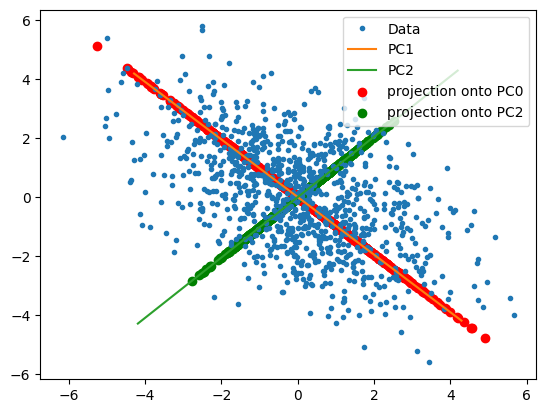

In [21]:
t = np.linspace(-6, 6, 10)
X = X - np.mean(X, axis=0)

plt.plot(X[:,0], X[:,1], '.', label='Data')
plt.plot(t*PC[0][0], t*PC[0][1], label='PC1')
plt.plot(t*PC[1][0], t*PC[1][1], label='PC2')
plt.scatter(p0[:,0], p0[:,1], color='red', label='projection onto PC0')
plt.scatter(p1[:,0], p1[:,1], color='green', label='projection onto PC2')
#plt.scatter(transf[0], transf[1], color='black', label='projection onto PC2')
plt.legend()

Text(0.5, 1.0, 'Data in principal components')

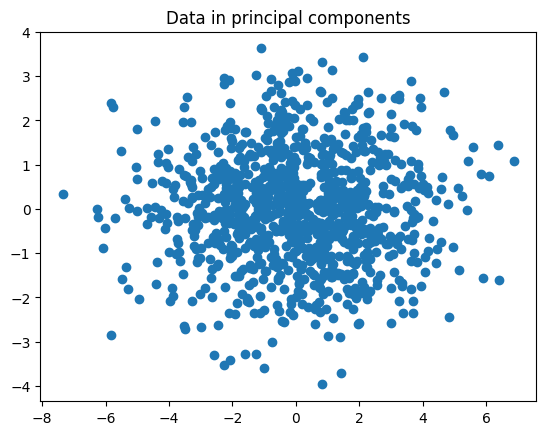

In [25]:
plt.scatter(transf[0], transf[1])
plt.title("Data in principal components")